# Project 1
### Don Padmaperuma

#### Bitcoin Alpha trusted weighted signed network

Bitcoin Alpha or BTC Alpha is a secure and reliable blockchain asset trading platform. This is who-trust-whom network of people who trade using Bitcoin use this platform. Since Bitcoin users are anonymous, there is a need to maintain a record of reputation or trust to prevent transactions with fraudulent and risky users. This dataset consists of rating data where members of Bitcoin Alpha rate other members in a scale of -10(total distrust) to +10 (total trust) in step of 1. 

**Source**: S. Kumar, F. Spezzano, V.S. Subrahmanian, C. Faloutsos. Edge Weight Prediction in Weighted Signed Networks. IEEE International Conference on Data Mining (ICDM), 2016.

In [18]:
import math
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import community
from scipy import stats
from operator import itemgetter
from tabulate import tabulate
%matplotlib inline

In [17]:
file = 'soc-sign-bitcoinalpha.csv'
bitc_alpha_df = pd.read_csv(file, header=None, names=['Source', 'Target', 'Rating', 'time'])
bitc_alpha_df= bitc_alpha_df.drop(columns = ['time'])#not needed for this analysis
bitc_alpha_df.head(6)

,Source,Target,Rating
0,7188,1,10
1,430,1,10
2,3134,1,10
3,3026,1,10
4,3010,1,10
5,804,1,10


In [3]:
bitc_alpha_df.tail(6)

,Source,Target,Rating
24180,7602,7601,10
24181,7604,7601,10
24182,7601,7604,10
24183,7604,7602,10
24184,7602,7604,10
24185,7604,7603,-10


In [4]:
bitc_alpha_df.describe()

,Source,Target,Rating
count,24186.000000,24186.000000,24186.000000
mean,864.029314,1051.093815,1.463946
std,1592.085638,1871.765504,2.903656
min,1.000000,1.000000,-10.000000
25%,58.000000,66.000000,1.000000
50%,238.000000,279.000000,1.000000
75%,898.000000,1068.000000,2.000000
max,7604.000000,7604.000000,10.000000


In [5]:
# Edges and nodes count
bitalpha_net = nx.from_pandas_edgelist(bitc_alpha_df, source = 'Source', target = 'Target', edge_attr = 'Rating')
bitalpha_net.number_of_edges()

14124

In [6]:
bitalpha_net.number_of_nodes()

3783

In [7]:
# use the Rating categorical variable and split it as positive and negative.
epos = {(u,v) for (u,v,d) in bitalpha_net.edges(data=True) if d['Rating'] >=0}
eneg = {(u,v) for (u,v,d) in bitalpha_net.edges(data=True) if d['Rating'] <0}

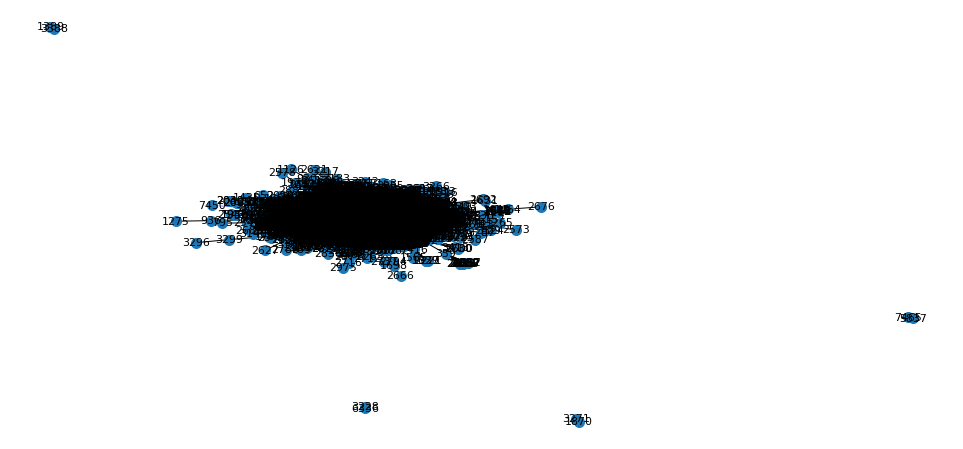

In [32]:
pos = nx.spring_layout(bitalpha_net)
plt.figure(figsize = (17,8))
nx.draw_networkx_nodes(bitalpha_net, pos, node_size = 100)

#edges
nx.draw_networkx_edges(bitalpha_net, pos, edgelist=epos, width = 1)
nx.draw_networkx_edges(bitalpha_net, pos, edgelist=eneg, width = 1,
                      alpha=0.5, edge_color='b', style='dashed')

#labels
nx.draw_networkx_labels(bitalpha_net, pos, font_size=11, font_family='DejaVu Sans')

plt.axis('off')
plt.show()

In [8]:
print("Nodes in the network: " + str (bitalpha_net.number_of_nodes()))

Nodes in the network: 3783


In [9]:
print("Edges in the network: " + str (bitalpha_net.number_of_edges()))

Edges in the network: 14124


### Degree Centrality

Node's degree is simply a count of how many social connections (edges) it has. 

In [13]:
deg = nx.degree(bitalpha_net)
deg_list = list(deg)
print("The maximum degree in the network is: "+ str (max(deg_list, key = itemgetter(1))[1]))

The maximum degree in the network is: 511


In [14]:
print("The minimum degree in the network is: "+ str (min(deg_list, key = itemgetter(1))[1]))

The minimum degree in the network is: 1


### Degree Centrality - Top 10

For degree centrality, higher values mean that the node is more central. As mentioned above, each centrality measure indicates a different type of importance. Degree centrality shows how many connections a person has. They may be connected to lots of people at the heart of the network, but they might also be far off on the edge of the network.

In [19]:
sorted_deg_list = sorted(deg_list, key=lambda tup: tup[1], reverse=True)
print(tabulate(sorted_deg_list[0:10], headers = ['UserID', 'Degree'],tablefmt='grid'))

+----------+----------+
|   UserID |   Degree |
+==========+==========+
|        1 |      511 |
+----------+----------+
|        8 |      279 |
+----------+----------+
|        3 |      263 |
+----------+----------+
|        2 |      239 |
+----------+----------+
|       11 |      238 |
+----------+----------+
|        7 |      234 |
+----------+----------+
|      177 |      229 |
+----------+----------+
|        4 |      221 |
+----------+----------+
|       15 |      213 |
+----------+----------+
|        5 |      190 |
+----------+----------+


### Closeness - Top 10

In a connected graph, closeness centrality (or closeness) of a node is a measure of centrality in a network, calculated as the reciprocal of the sum of the length of the shortest paths between the node and all other nodes in the graph. Thus, the more central a node is, the closer it is to all other nodes.


In [25]:
close = nx.closeness_centrality(bitalpha_net)
sorted_close = sorted(close.items(), key=itemgetter(1), reverse = True)
print(tabulate(sorted_close[0:10], headers = ['UserID', 'Closeness'],tablefmt='grid'))

+----------+-------------+
|   UserID |   Closeness |
+==========+=============+
|        2 |    0.445946 |
+----------+-------------+
|       11 |    0.437248 |
+----------+-------------+
|        1 |    0.423481 |
+----------+-------------+
|       10 |    0.418168 |
+----------+-------------+
|       22 |    0.412714 |
+----------+-------------+
|       95 |    0.408019 |
+----------+-------------+
|        4 |    0.407445 |
+----------+-------------+
|        9 |    0.405428 |
+----------+-------------+
|       15 |    0.404513 |
+----------+-------------+
|       26 |    0.403516 |
+----------+-------------+


Clseness points UserIDs that apears in Centrality are: 2, 11, 1, 4, 15.

### Betweenness - Top 10

Betweenness is useful for analyzing communication dynamics, but should be used with care. A high betweenness count could indicate someone holds authority over disparate clusters in a network, or just that they are on the periphery of both clusters.

In [28]:
between = nx.betweenness_centrality(bitalpha_net)
sorted_between = sorted(between.items(), key=itemgetter(1), reverse = True)
print(tabulate(sorted_between[0:10], headers = ['UserID', 'Betweenness'],tablefmt='grid'))

+----------+---------------+
|   UserID |   Betweenness |
+==========+===============+
|        1 |     0.177799  |
+----------+---------------+
|        2 |     0.0736655 |
+----------+---------------+
|        8 |     0.0629794 |
+----------+---------------+
|        4 |     0.0580725 |
+----------+---------------+
|       11 |     0.0552314 |
+----------+---------------+
|       15 |     0.0549427 |
+----------+---------------+
|        3 |     0.049057  |
+----------+---------------+
|       13 |     0.0420899 |
+----------+---------------+
|       10 |     0.0400261 |
+----------+---------------+
|      177 |     0.0388168 |
+----------+---------------+


### Eigenvector - Top 10

Eigenvector centrality measures the influence of a node in this network.

In [33]:
eigen = nx.eigenvector_centrality(bitalpha_net)
sorted_eigen = sorted(eigen.items(), key=itemgetter(1), reverse = True)
print(tabulate(sorted_eigen[0:10], headers = ['UserID', 'Eigen Vector'],tablefmt='grid'))

+----------+----------------+
|   UserID |   Eigen Vector |
+==========+================+
|       11 |       0.193242 |
+----------+----------------+
|        2 |       0.173989 |
+----------+----------------+
|      177 |       0.166268 |
+----------+----------------+
|        3 |       0.158632 |
+----------+----------------+
|        7 |       0.154777 |
+----------+----------------+
|        8 |       0.151178 |
+----------+----------------+
|       26 |       0.147398 |
+----------+----------------+
|        1 |       0.136455 |
+----------+----------------+
|       95 |       0.130958 |
+----------+----------------+
|       24 |       0.129486 |
+----------+----------------+


Users with higher degree centrality such as 4, 5 and 15 does not appear in eigen vector centrality top 10. This means these users have lot of connections but not well connected. Similarly, users like 95 and 24 have small well connected networks. User 11 is considered as the most influencial person in this top 10. 
This shows the having large number of connections does not make that user as the most influential person.

### Sub-Network by Trust

As we took a quick look at our network and found out which users are more powerful or more influential and who has more connections in the network, its time to look at the trust score. The ratings are assigned as -10 being the most untrustworthy to +10 being the most trustworthy. 

#### Highly Positive Network
Let's consider the positive nework as the nodes with Rating > 5.

In [36]:
bitalpha_pos = bitc_alpha_df.loc[bitc_alpha_df['Rating']>5]
print(bitc_alpha_df.head())

   Source  Target  Rating
0    7188       1      10
1     430       1      10
2    3134       1      10
3    3026       1      10
4    3010       1      10


In [38]:
# Number of edges and nodes in the positive network

bitalpha_pos_net = nx.from_pandas_edgelist(bitalpha_pos, source = 'Source', target = 'Target', edge_attr = 'Rating')
print("Number of edges in the positive network: " + str(bitalpha_pos_net.number_of_edges()))
print("Number of nodes in the positive network: " + str(bitalpha_pos_net.number_of_nodes()))

Number of edges in the positive network: 879
Number of nodes in the positive network: 725


In [42]:
# Degree of positive network

pos_deg = nx.degree(bitalpha_pos_net)
pos_deg_list = list(pos_deg)
print("The maximum degree in the positive network: " + str(max(pos_deg_list,key=itemgetter(1))[1]))
print("The minimum degree in the positive network: " + str(min(pos_deg_list, key=itemgetter(1))[1]))

The maximum degree in the positive network: 53
The minimum degree in the positive network: 1


In [45]:
# Print the sorted list of Degrees

sorted_pos_deg_list = sorted(pos_deg_list, key=lambda tup: tup[1], reverse=True)
print(tabulate(sorted_pos_deg_list[0:10], headers = ['UserID', 'Degree'],tablefmt='grid'))

+----------+----------+
|   UserID |   Degree |
+==========+==========+
|        2 |       53 |
+----------+----------+
|      177 |       25 |
+----------+----------+
|        4 |       24 |
+----------+----------+
|        5 |       21 |
+----------+----------+
|        6 |       21 |
+----------+----------+
|       20 |       17 |
+----------+----------+
|        9 |       17 |
+----------+----------+
|       11 |       16 |
+----------+----------+
|        7 |       16 |
+----------+----------+
|     7604 |       16 |
+----------+----------+


In [47]:
# Print the sorted list of Eigen vectors

pos_eigen = nx.eigenvector_centrality(bitalpha_pos_net)
sorted_pos_eigen = sorted(pos_eigen.items(), key=itemgetter(1), reverse = True)
print(tabulate(sorted_pos_eigen[0:10], headers = ['UserID', 'Eigen Vector'],tablefmt='grid'))

+----------+----------------+
|   UserID |   Eigen Vector |
+==========+================+
|        2 |       0.513013 |
+----------+----------------+
|       20 |       0.237412 |
+----------+----------------+
|        9 |       0.233388 |
+----------+----------------+
|        4 |       0.230455 |
+----------+----------------+
|     7603 |       0.213671 |
+----------+----------------+
|      159 |       0.187259 |
+----------+----------------+
|       22 |       0.18204  |
+----------+----------------+
|       47 |       0.159847 |
+----------+----------------+
|       31 |       0.148484 |
+----------+----------------+
|       37 |       0.147432 |
+----------+----------------+


Out of 3783 total nodes in the network there are only 725 has rating more than 5 or as we call it highly positive. This is around 5% of the whole network that has ratings more than 5. When you compare the two list we can note that only user 2 appears in both lists. 

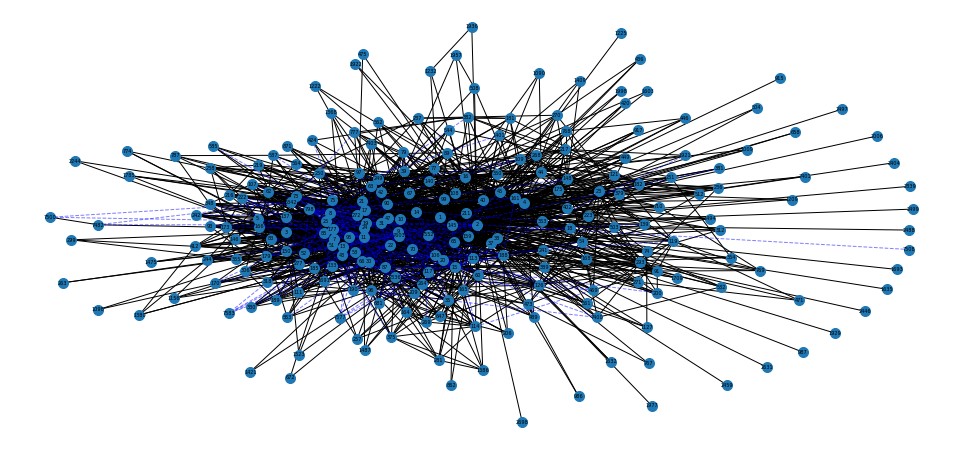

In [53]:
# Network of User 2

user_2 = nx.ego_graph(bitalpha_net, 2)
epos = {(u,v) for (u,v,d) in user_2.edges(data=True) if d['Rating'] >=0}
eneg = {(u,v) for (u,v,d) in user_2.edges(data=True) if d['Rating'] <0}

pos = nx.spring_layout(user_2)

plt.figure(figsize=(17,8))
nx.draw_networkx_nodes(user_2, pos, node_size = 100)

nx.draw_networkx_edges(user_2, pos, edgelist=epos, width = 1)
nx.draw_networkx_edges(user_2, pos, edgelist=eneg, width = 1, alpha = 0.5, edge_color = 'b', style = 'dashed')

nx.draw_networkx_labels(user_2, pos, font_size = 5, font_family = 'DejaVu Sans')

plt.axis ('off')
plt.show()

#### Highly Negative Network

In this section we will explore the ones with rating less than -5. 

In [59]:
bitalpha_neg = bitc_alpha_df.loc[bitc_alpha_df['Rating']<-5]
print(bitalpha_neg.tail())

       Source  Target  Rating
24158    7595    7556     -10
24161    7564    7596     -10
24164    7595    7604     -10
24172    7598    7603     -10
24185    7604    7603     -10


In [58]:
# Number of edges and nodes in the negative network

bitalpha_neg_net = nx.from_pandas_edgelist(bitalpha_neg, source = 'Source', target = 'Target', edge_attr = 'Rating')
print("Number of edges in the negative network: " + str(bitalpha_neg_net.number_of_edges()))
print("Number of nodes in the negative network: " + str(bitalpha_neg_net.number_of_nodes()))

Number of edges in the positive network: 776
Number of nodes in the positive network: 549


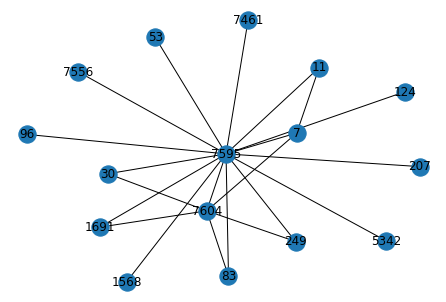

In [60]:
# Visualization of User 7595

user_7595 = nx.ego_graph(bitalpha_neg_net, 7595)
nx.draw(user_7595, with_labels = True)
plt.show()


In [61]:
# Degree of negative network

neg_deg = nx.degree(bitalpha_neg_net)
neg_deg_list = list(neg_deg)
print("The maximum degree in the negative network: " + str(max(neg_deg_list,key=itemgetter(1))[1]))
print("The minimum degree in the negative network: " + str(min(neg_deg_list, key=itemgetter(1))[1]))

The maximum degree in the negative network: 67
The minimum degree in the negative network: 1


In [62]:
# Print the sorted list of Degrees

sorted_neg_deg_list = sorted(neg_deg_list, key=lambda tup: tup[1], reverse=True)
print(tabulate(sorted_neg_deg_list[0:10], headers = ['UserID', 'Degree'],tablefmt='grid'))

+----------+----------+
|   UserID |   Degree |
+==========+==========+
|     7604 |       67 |
+----------+----------+
|        5 |       40 |
+----------+----------+
|      177 |       38 |
+----------+----------+
|        7 |       34 |
+----------+----------+
|     7603 |       31 |
+----------+----------+
|       11 |       27 |
+----------+----------+
|     7564 |       25 |
+----------+----------+
|     5342 |       20 |
+----------+----------+
|       30 |       20 |
+----------+----------+
|       43 |       19 |
+----------+----------+


In [63]:
# Print the sorted list of Eigen vectors

neg_eigen = nx.eigenvector_centrality(bitalpha_neg_net)
sorted_neg_eigen = sorted(neg_eigen.items(), key=itemgetter(1), reverse = True)
print(tabulate(sorted_neg_eigen[0:10], headers = ['UserID', 'Eigen Vector'],tablefmt='grid'))

+----------+----------------+
|   UserID |   Eigen Vector |
+==========+================+
|     7604 |       0.409056 |
+----------+----------------+
|      177 |       0.307497 |
+----------+----------------+
|        7 |       0.22691  |
+----------+----------------+
|     7598 |       0.223237 |
+----------+----------------+
|     7602 |       0.207344 |
+----------+----------------+
|     7599 |       0.198232 |
+----------+----------------+
|     7601 |       0.188605 |
+----------+----------------+
|      179 |       0.166366 |
+----------+----------------+
|     7603 |       0.165846 |
+----------+----------------+
|      188 |       0.16234  |
+----------+----------------+


Besed on the negative network degree and eigen vector we see that user 7604, 177 and 7 in both top 10 lists of degree centrality and eigen vector. We can safely assume that these users have lot of untrustworthy connections. 

#### Further Analysis

Further Analysis can be done to see how individual clusters behave in the positive and negative network. 

#### Reference 

https://snap.stanford.edu/data/soc-sign-bitcoin-alpha.html

https://networkx.org/documentation/latest/auto_examples/drawing/plot_weighted_graph.html
